In [12]:
#基础库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
#评分库
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,confusion_matrix,classification_report
from sklearn import metrics
#导入分类库
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#聚类相关库
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
#降维
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
#导入数据集
base_dataset1 = pd.read_csv('iBeacon_RSSI_Labeled.csv')
base_dataset2 = pd.read_csv('iBeacon_RSSI_Unlabeled.csv')

In [4]:
#数据预处理
counts = base_dataset1.location.value_counts()
filt = counts[counts>5].index
pro_dataset1 = base_dataset1[base_dataset1['location'].isin(filt)]
pro_dataset1

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
8,R01,10-18-2016 11:15:05,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200
9,R01,10-18-2016 11:15:03,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [5]:
#划分数据集
y = pro_dataset1.location
x = pro_dataset1.iloc[:,2:15]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=36)

In [6]:
def score(model,x_train, y_train,x_test, y_test):
    print (model.__class__.__name__ + ":")
    print ("训练集的准确率为: {:.4f}".format(model.score(x_train, y_train)))
    print ("测试集的准确率为: {:.4f}".format(model.score(x_test, y_test)))

In [8]:
rfc = RandomForestClassifier(n_estimators=12).fit(x_train,y_train) 
score(rfc,x_train, y_train,x_test, y_test)

RandomForestClassifier:
训练集的准确率为: 0.5945
测试集的准确率为: 0.3187


In [21]:
dt = DecisionTreeClassifier(max_depth=20).fit(x_train,y_train)
score(dt,x_train, y_train,x_test, y_test)

DecisionTreeClassifier:
训练集的准确率为: 0.5838
测试集的准确率为: 0.3216


In [22]:
svc = SVC().fit(x_train,y_train) 
score(svc,x_train, y_train,x_test, y_test)

SVC:
训练集的准确率为: 0.4971
测试集的准确率为: 0.3158


In [23]:
x = base_dataset2.iloc[:,2:]

In [25]:
#可视化
def plot(x,label):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    tsne = TSNE(n_components=2, learning_rate=80).fit_transform(x)
    plt.scatter(tsne[:, 0], tsne[:, 1], c=label)
    plt.title("tSNE")
    plt.colorbar()
    plt.subplot(122)
    pca = PCA().fit_transform(x)  
    plt.scatter(pca[:, 0], pca[:, 1], c=label)
    plt.title("PCA")
    plt.colorbar()
    fig = plt.figure()
    axes3d = Axes3D(fig)
    pca = PCA(n_components=3).fit_transform(x)
    axes3d.scatter3D(pca[:, 0],pca[:, 1],pca[:, 2],c=label)

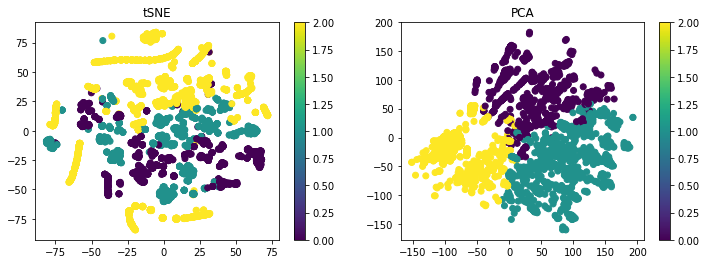

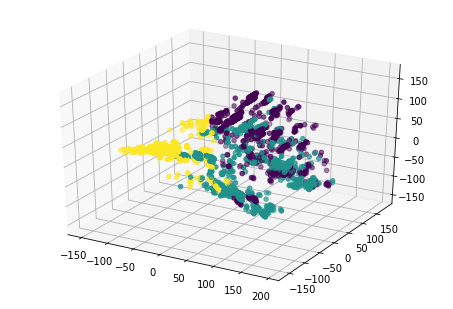

In [26]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
label=kmeans.labels_
plot(x,label)

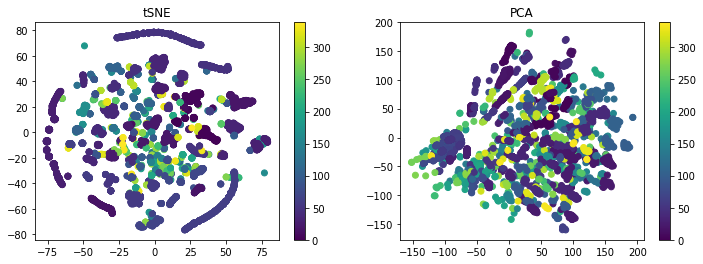

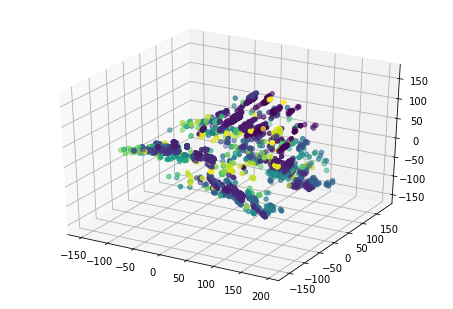

In [27]:
dbscan = DBSCAN(eps=80,min_samples=1,metric='euclidean').fit(x)
db_target=dbscan.labels_
plot(x,db_target)

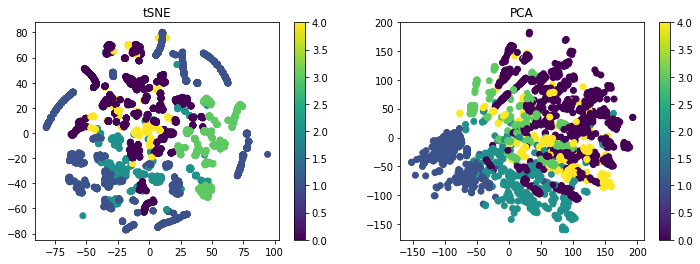

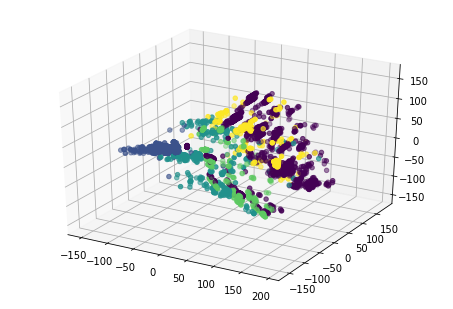

In [28]:
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0).fit(x)
gmm_target=gmm.predict(x)
plot(x,gmm_target)

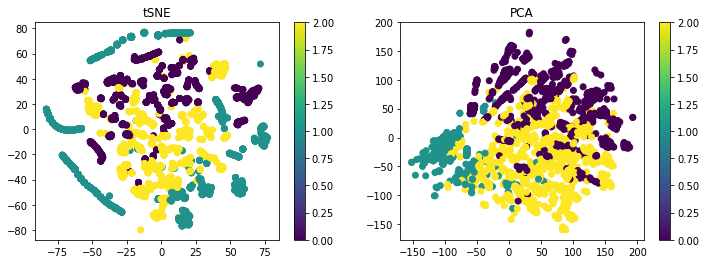

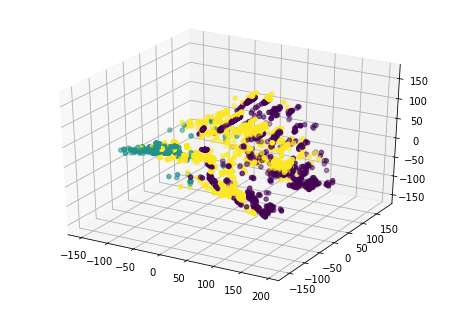

In [29]:
agg = AgglomerativeClustering(n_clusters=3).fit(x)
agg_target=agg.labels_
plot(x,agg_target)